In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from utils import *
from equations import *

# Manually making sure the numpy random seeds are "the same" on all devices
np.random.seed(1234)
tf.random.set_seed(1234)

# Hyper parameters {{{
hp = {}
# Data size on the solution u
hp["N_u"] = 100
# Collocation points size, where we’ll check for f = 0
hp["N_f"] = 200
# DeepNN topology (2-sized input [x t], 8 hidden layer of 20-width, 1-sized output [u]
hp["layers"] = [1, 20, 20, 20, 20, 20, 4]
hp["h_layers"] = [2, 20, 20, 20, 20, 20, 20, 20, 20, 2]
hp["C_layers"] = [2, 20, 20, 20, 20, 20, 20, 20, 20, 1]
# Setting up the TF SGD-based optimizer (set tf_epochs=0 to cancel it)
hp["tf_epochs"] = 100000
hp["tf_lr"] = 0.001
hp["tf_b1"] = 0.99
hp["tf_eps"] = 1e-1
# Setting up the quasi-newton LBGFS optimizer (set nt_epochs=0 to cancel it)
hp["nt_epochs"] = 50000
hp["nt_lr"] = 0.8
hp["nt_ncorr"] = 50
hp["log_frequency"] = 1000
hp["use_tfp"] = True
# Record the history
hp["save_history"] = True
hp["history_frequency"] = 10
# path for loading data and saving models
repoPath = "./"
appDataPath = os.path.join(repoPath, "matlab_SSA", "DATA")
#path = os.path.join(appDataPath, "SSA2D_nocalving.mat")
#path = os.path.join(appDataPath, "SSA2D_seg_nocalving.mat")
#path = os.path.join(appDataPath, "SSA2D_segCF.mat")
#path = os.path.join(appDataPath, "Helheim_Weertman_iT080_PINN_fastflow_CF.mat")
path = os.path.join(appDataPath, "Helheim_Weertman_iT080_PINN_flowline_CF.mat")

modelPath = "./Models/test"
reloadModel = False # reload from previous training
#}}}

In [2]:
# load the data
x, Exact_vel, X_star, u_star, X_u_train, u_train, X_f, X_bc, u_bc, X_cf, n_cf, xub, xlb, uub, ulb, mu = prep_Helheim_data_flowline(path, hp["N_u"], hp["N_f"])

# Creating the model and training
logger = Logger(hp)
pinn = SSA1D_calvingfront_invertC(hp, logger, X_f,
        X_bc, u_bc,
        X_cf, n_cf,
        xub, xlb, uub, ulb,
        modelPath, reloadModel,
        mu=mu,
        loss_weights=[1e-5, 1e-3, 1e-5, 1e-8, 1e-14])

X_u = pinn.tensor(X_star)
u = pinn.tensor(u_star)
# error function for logger
def error():
    return pinn.test_error(X_u, u)
logger.set_error_fn(error)

# train the model
pinn.fit(X_u_train, u_train)
# pinn.fit(X_bc, u_bc)

Hyperparameters:
{
  "N_u": 100,
  "N_f": 200,
  "layers": [
    1,
    20,
    20,
    20,
    20,
    20,
    4
  ],
  "h_layers": [
    2,
    20,
    20,
    20,
    20,
    20,
    20,
    20,
    20,
    2
  ],
  "C_layers": [
    2,
    20,
    20,
    20,
    20,
    20,
    20,
    20,
    20,
    1
  ],
  "tf_epochs": 100000,
  "tf_lr": 0.001,
  "tf_b1": 0.99,
  "tf_eps": 0.1,
  "nt_epochs": 50000,
  "nt_lr": 0.8,
  "nt_ncorr": 50,
  "log_frequency": 1000,
  "use_tfp": true,
  "save_history": true,
  "history_frequency": 10
}

TensorFlow version: 2.4.1
Eager execution: True
GPU-accerelated: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Training started
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
minmax_scale_layer (MinmaxSc (None, 1)                 4         
_________________________________________________________________
dense (Dense)          

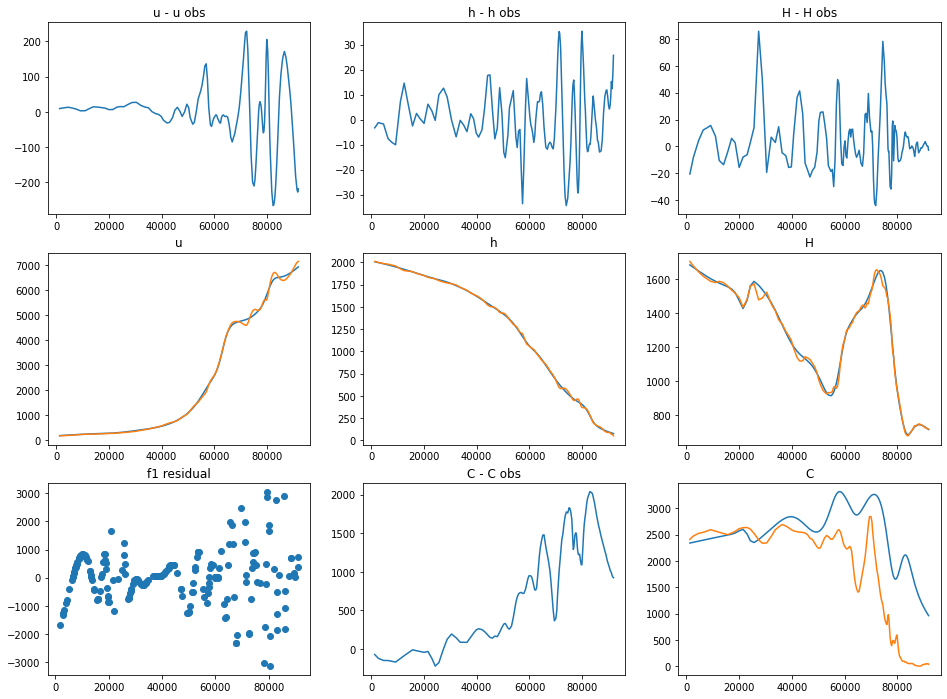

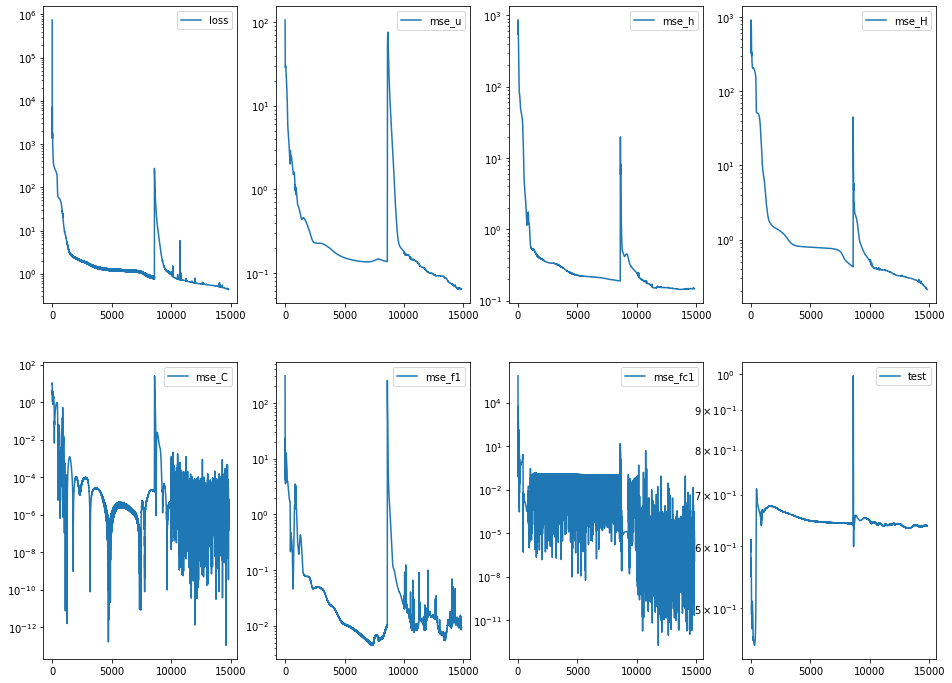

In [3]:
# plot
plot_1D_solutions_all(pinn, X_f, X_star, u_star, xlb, xub)

# history
plot_log_history(pinn)

In [13]:
import pickle
pickle.dump(pinn.logger.history, open("save.p", "wb"))

In [14]:
a = pickle.load( open( "save.p", "rb" ) )

In [15]:
a

{'loss': [744091.7131774048,
  1486.9950006507747,
  53091.13079529605,
  3513.2943481273996,
  1450.977060091566,
  5769.8691193341965,
  21607.70365395295,
  18997.961969320673,
  6445.853558848503,
  1898.4550518787162,
  1475.9771031171,
  1487.8738812028182,
  1878.192225424711,
  3561.9869556985977,
  6135.5968871502955,
  7284.850562725375,
  5931.136806813256,
  3699.8683000335677,
  2184.586426918418,
  1574.8722216437052,
  1450.042051028657,
  1465.1633668959482,
  1468.0789843552543,
  1428.172242059011,
  1370.368467896189,
  1336.818890212886,
  1362.6590417900234,
  1458.4866422595182,
  1601.5385299441516,
  1741.6452994717665,
  1823.4640303145034,
  1814.4138474648032,
  1719.9248220741874,
  1576.1754162856603,
  1428.5334766370806,
  1311.9481672104323,
  1242.26451346283,
  1217.1029513491435,
  1221.4607937944477,
  1235.022224369101,
  1239.729552460172,
  1225.59137179127,
  1192.332116285653,
  1146.4620722357402,
  1096.2212270003238,
  1047.649527106817,
  10